In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

sales_data = pd.read_csv('retail_sales.csv')
sales_data['date']=pd.to_datetime(sales_data['date'])
sales_data.set_index('date', inplace=True)
sales_data.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


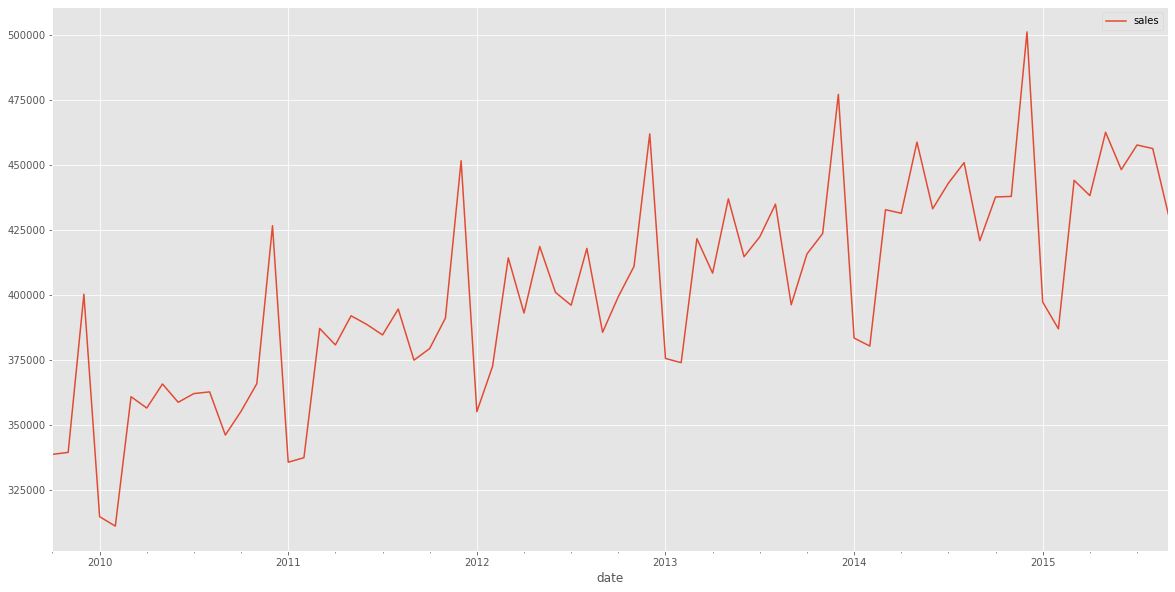

In [2]:
sales_data.plot()

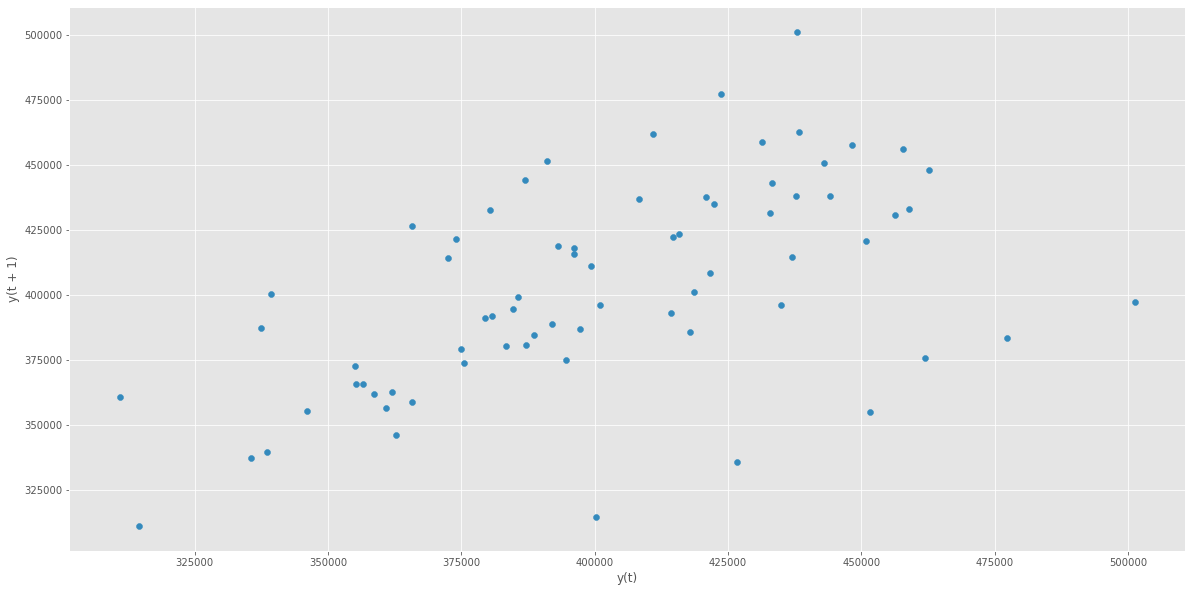

In [7]:
# Let’s check for dependance (aka, correlation) – which is the first assumption for autoregression models.
# Because we don’t have many data points, this particular lag_plot() doesn’t look terribly convincing, 
# but there is some correlation in there (along with some possible outliers).
from pandas.plotting import lag_plot
pd.plotting.lag_plot(sales_data['sales'])

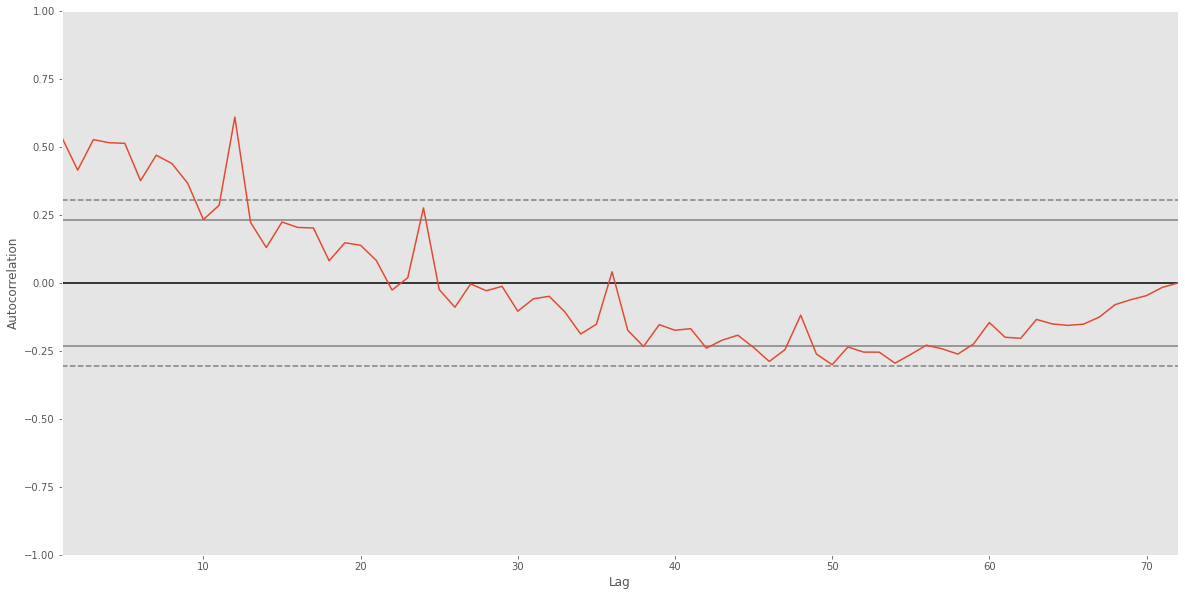

In [8]:
# The resulting chart contains a few lines on it separate from the autocorrelation function. 
# The dark horizontal line at zero just denotes the zero line, 
# the lighter full horizontal lines is the 95% confidence level 
# and the dashed horizontal lines are 99% confidence levels, 
which means that correlations are more significant if they occur at those levels.
pd.plotting.autocorrelation_plot(sales_data['sales'])
# From the plot above, we can see there’s some significant correlation between t=1 and t=12 (roughly) 
# with significant decline in correlation after that timeframe.  

In [10]:
# We can test this concept by checking the pearson correlation of the sales data 
# with lagged values using the approach below.
sales_data['sales'].corr(sales_data['sales'].shift(12))
# We used ’12’ above because that looked to be the highest correlation value from the autocorrelation chart. 
# The output of the above command gives us a correlation value of 0.97 which is quite high 
# (and actually almost too high for my liking, but it is what it is).

0.9790985975895788

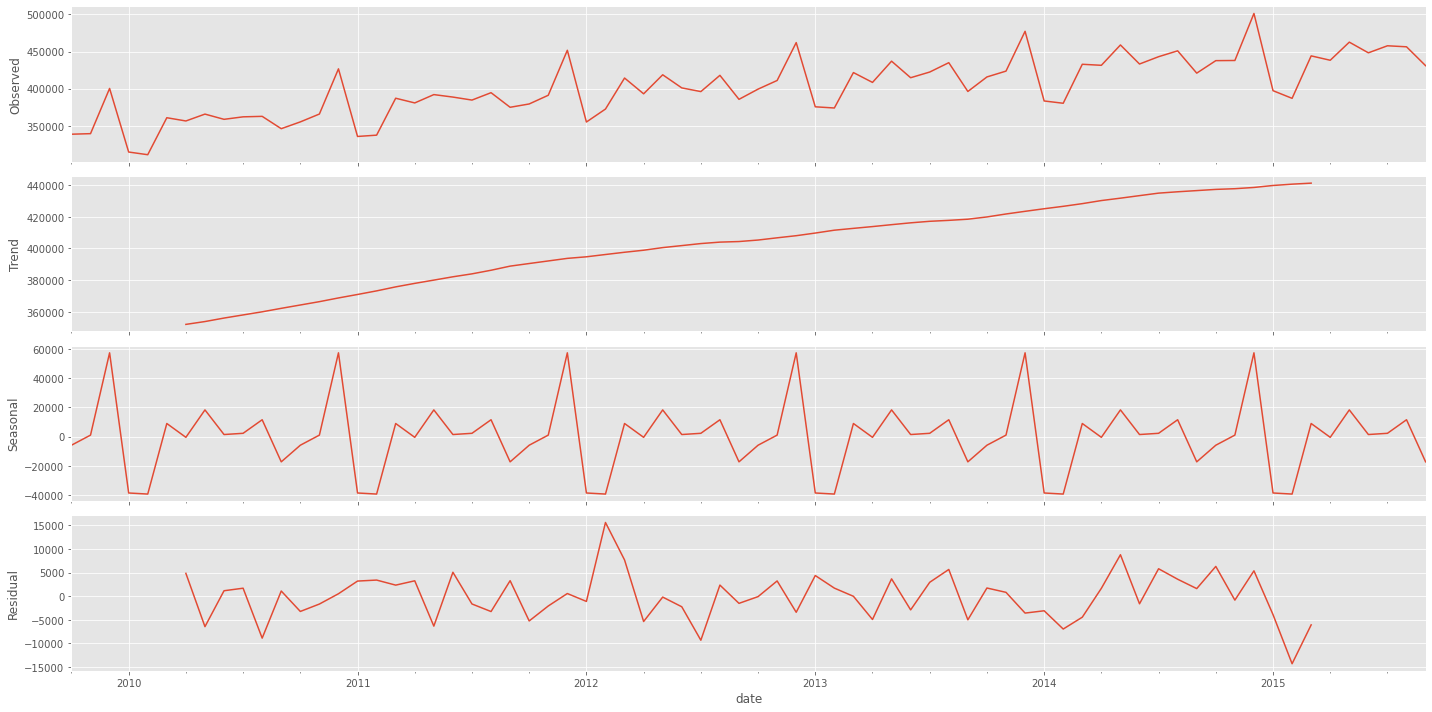

In [11]:
# I can tell you just from looking at that chart that we have a non-stationary dataset 
# due to the increasing trend from lower left to upper right as well as some seasonality 
# (you can see large spikes at roughly the same time within each year). 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(sales_data['sales'], model='additive')
x = decomposed.plot()
# Now we know for certain that we have a time series that has a trend 
# (2nd panel from top) and has seasonality (third panel from top). 

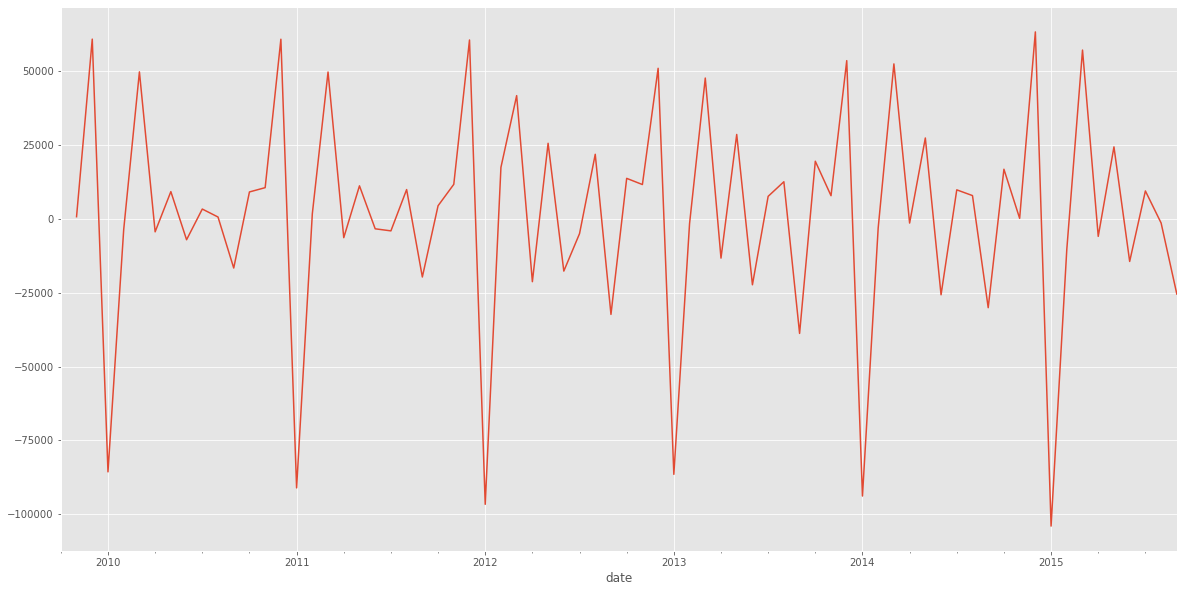

In [18]:
# differencing to get a more stationary model
sales_data['stationary']=sales_data['sales'].diff()
y=sales_data['stationary'].plot()

In [21]:
sales_data.head()

,sales,stationary
date,,
2009-10-01,338630,NaN
2009-11-01,339386,756.0
2009-12-01,400264,60878.0
2010-01-01,314640,-85624.0
2010-02-01,311022,-3618.0


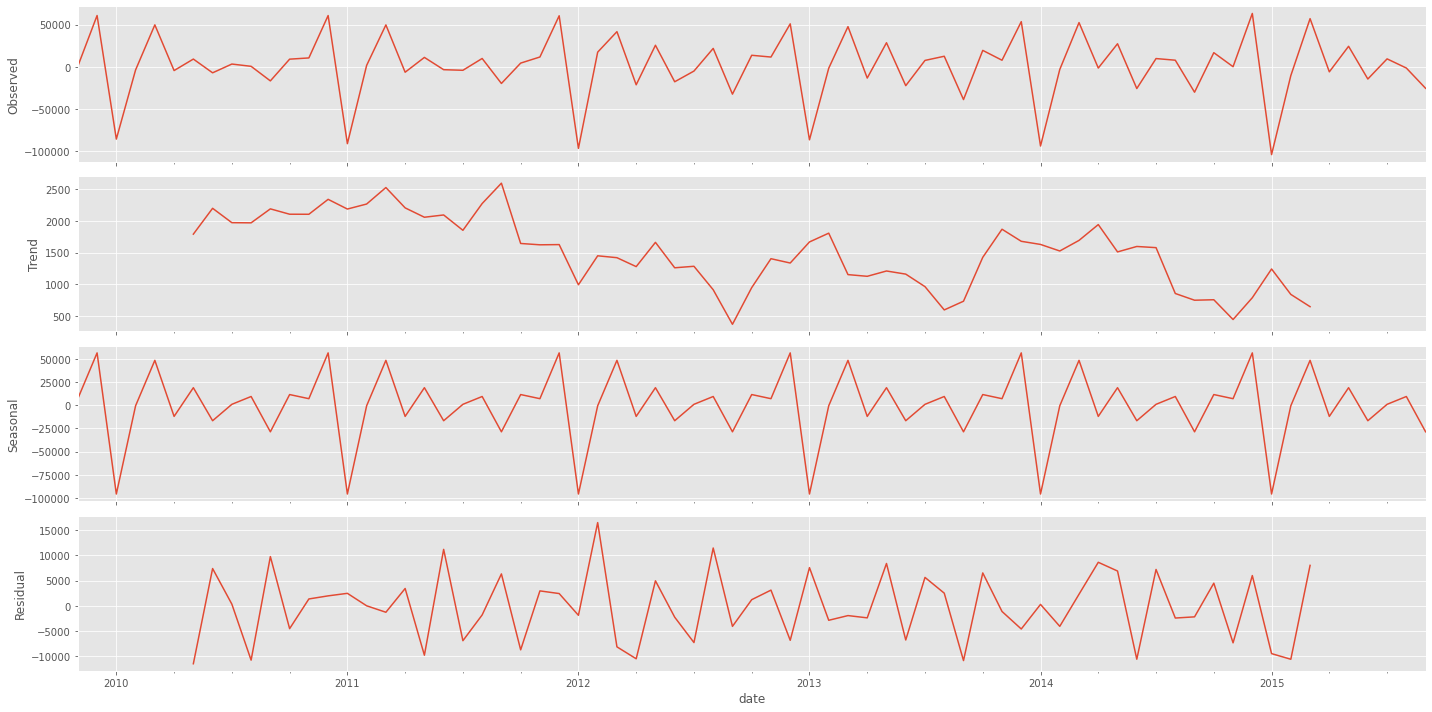

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(sales_data['stationary'].dropna(), model='additive')
x =decomposed.plot()